# Project 5: Data Collection and Storage (SQL)

##  Introduction and Project Description

This project involves conducting a comprehensive data analysis for Zuber, a new ride-sharing compnay that's launching in Chicago. The overarching goals is to find patterns in the available information in order to understand passenger preferences and the impact of external factors on rides.  Working within multiple datasets from competitors and test a hypothesis about the imapct of weather on ride freuqency. 

To begin the first step of the porject, the focus will need to be on findings patterns in the available information related to both passenger preferences and the impact of external factors (such as weather) on rides. 

## Data Quality Evaluation and Analysis Framework

The data analysis will rely on two separate datasets and are located in the followings files: **/datasets/project_sql_result_04.csv** and **/datasets/project_sql_result_07.csv**.  The datasets contain information which identifies taxi company names, number of rides for each taxi comapny, Chicago neighborhoods where rides endedthe average number of rides that ended in each neighborhood in November 2017. To support testing the hypotheses the data anlysis relies on the following dataset **/datasets/project_sql_result_07.csv**, which contains data on rides from the Loop to O'Hare International Airport. 

A preliminary overview of the datasets have been conducted to assess the overall quality of the data, with further exploration planned through detailed exploratory data analysis (EDA). 

### Description of the Data 

A dataset with info on taxi rides in Chicago: 
- **company_name:** taxi company name
- **trips_amount:** the number of rides for each taxi company on November 15-16, 2017.
- **dropoff_location_name:** Chicago neighborhoods where rides ended
- **average_trips:** the average number of rides that ended in each neighborhood in November 2017.

A dataset on rides from the Loop to O'Hare International Airport:
- **start_ts:** pickup date and time
- **weather_conditions:** weather conditions at the moment the ride started
- **duration_seconds:** ride duration in seconds

The systematic approach to analyze data: 

Stage 1: Data Overview, General Information Revew and Exploratory Data Analysis 
Conduct a thorough review to evaluate the quality of the data and identify any significant issues, and understanding the available data.
- Data Sources: Access to internal data from Zuber, including information on respective taxi companies, number of reides for each taxi company, Chicago neighborhoods where rides ended, the average number of rides ended in each neighborhood.
- External Data: Weather data in an important external factor to analyzing, so obtaining historical weather data is key.

  A. Importing the files

  B. Data Inspection and Cleaning

  C. Idenitfy the Top 10 Neighborhoods by Number of Drop-Offs

  D. Visualization: Taxi Companies and Number of Rides

  E. Visualization: Top 10 Neighborhoods by Number of Drop-offs


Stage 2: Test Hypotheses
- Test releveant hypothese to validate assumptions and information decision-making. 
  
  A. Forming the Hypotheses
  
  B. Importing the files
  
  C. Data Inspection and Cleaning
  
  D. Filter for Rainy Saturdays and Other Days
  
  E. Statistical Test Selection
  
  F. Conducting the Two-Sample T-Test
  
  G. Making a Decision Based on the P-Value

Stage 3: Combine Summary of Key Findings - Conclusions
- Summarize findings and present conclusions.

# Stage 1: Data Overview and General information Review

**A. Importing the files**

In [1]:
# imports the necessary libraries and loading CSV files essential for data manipulation and plotting
import pandas as pd # data manipulation and analysis
import numpy as np # numerical computing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from scipy import stats # scientific and technical computing

In [2]:
# load the dataset - read the CSV file, load and assign to specified dataframe
df_taxico_trips = pd.read_csv('/datasets/project_sql_result_01.csv') # assigned to taxico_trips

In [3]:
# load the dataset - read the CSV file, load and assign to specified dataframe
df_dropoff_avg = pd.read_csv('/datasets/project_sql_result_04.csv') # assigned to dropoff_avg

In [4]:
# taxico_trips - Display the first few rows of each dataset to understand the structure 
print("\nFirst few rows of the TaxiCo_Trips dataset: \n", df_taxico_trips.head())


First few rows of the TaxiCo_Trips dataset: 
                       company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [5]:
# dropoff_avg - Display the first few rows of each dataset to understand the structure
print("\nFirst few rows of the Dropoff_AVG dataset: \n", df_dropoff_avg.head())


First few rows of the Dropoff_AVG dataset: 
   dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


**B. Data Inspection and Cleaning**

Ensure the data is clean and the data types are correct. A check for missing values, incorrect data types, and any inconsistencies.

**TaxiCo_Trips**

In [6]:
# Check for missing values and data types
print("General Information: \n")
df_taxico_trips.info()

General Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
# Check for any missing or incorrect data types
# Ensure 'trips_amount' is numeric and 'company_name' is a string
df_taxico_trips['trips_amount'] = pd.to_numeric(df_taxico_trips['trips_amount'], errors='coerce')

In [8]:
# Check for missing values after conversion
print(df_taxico_trips.isnull().sum())

company_name    0
trips_amount    0
dtype: int64


**Dropoff_AVG**

In [9]:
# Check for missing values and data types 
print("General Information: \n")
df_dropoff_avg.info()

General Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# Ensure 'average_trips' is numeric and 'dropoff_location_name' is a string
df_dropoff_avg['average_trips'] = pd.to_numeric(df_dropoff_avg['average_trips'], errors='coerce')

In [11]:
# Check for missing values after conversion
print(df_dropoff_avg.isnull().sum())

dropoff_location_name    0
average_trips            0
dtype: int64


After data inspection and cleaning, it has been determined there are no missing values. Converting columns to the correct data types has been completed. 

**C. Idenitfy the Top 10 Neighborhoods by Number of Drop-Offs**

The second dataframe (df_dropoff_avg) will be sorected by the average_trips column to find the neighborhoods with the highest average number of rides.

In [12]:
# Sort the neighborhoods by average trips to find the top 10
top_10_neighborhoods = df_dropoff_avg.sort_values(by='average_trips', ascending=False).head(10)

In [13]:
# Display the top 10 neighborhoods
print(top_10_neighborhoods[['dropoff_location_name', 'average_trips']])

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


**D. Visualization: Taxi Companies and Number of Rides**

Plot the number of rides for each taxi company to see the distribution of rides across different companies. 

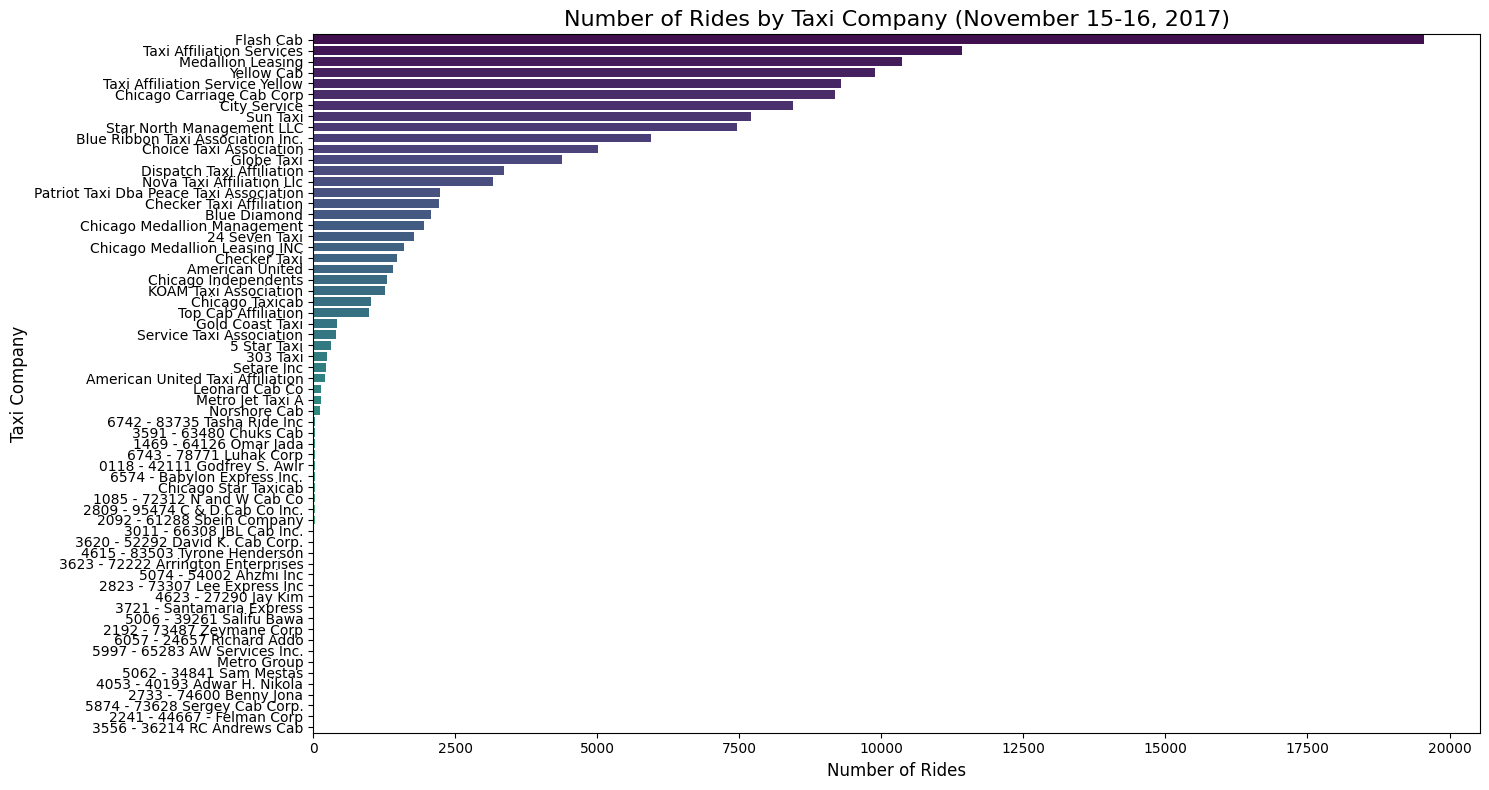

In [14]:
# Plot the number of rides per taxi company with swapped axes
plt.figure(figsize=(15, 8))
sns.barplot(data=df_taxico_trips, y='company_name', x='trips_amount', palette='viridis')

# Add labels and title
plt.title('Number of Rides by Taxi Company (November 15-16, 2017)', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Taxi Company', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Summary of Conclusions for Taxi Companies and Number of Rides**

*Analysis:* From the bar plot, we are able to identify which taxi companies have the highest number of trips during November 15-16, 2017.
*Possible Conclusions:* If Zuber was listed as one of the companies in the dataset, it's performance can be compared to competitors. If Zuber show a low number of rides, it might need to focus on marketing or expanding its coverage to compete with larger companies. 

Investigating further into marketing strategies or other operational factors that might help increase the number of rides, such as surge pricing or targeting underserved neighborhoods. 

**E. Visualization: Top 10 Neighborhoods by Number of Drop-offs**

Create a bar plot for the top 10 neighborhoods based on the average_trips.

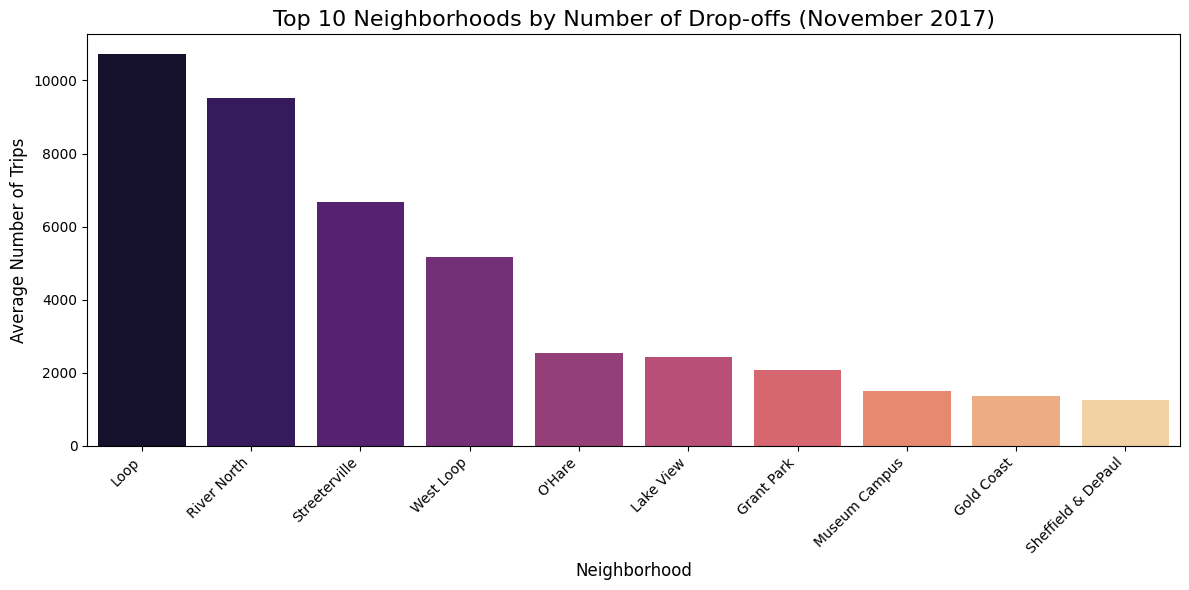

In [15]:
# Plot the top 10 neighborhoods by average number of drop-offs
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_neighborhoods, x='dropoff_location_name', y='average_trips', palette='magma')

# Add labels and title
plt.title('Top 10 Neighborhoods by Number of Drop-offs (November 2017)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Number of Trips', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plt
plt.tight_layout()
plt.show()

**Summary of Conclusions for the Top 10 Neighborhoods by Number of Drop-offs**

*Analysis:* From the bar plot, we are able to identify the neighborhoods with the most ride drop-offs. 

*Possible Conclusions:* Zuber might want to focus on ensuring coverage in these top neighborhoods to meet demand. If some neighborhoods are underserved by competitors, Zuber could position itself as a preferred service provider.

Zuber could create targeted promotions or campaigns in high-demand neighborhoods or look at how to optimize routing for drivers to minimize wait times in these areas.

# Stage 2: Test Hypotheses

**A. Forming the Hypotheses**

*Null Hypothesis (H₀):*
The average duration of rides from the Loop to O'Hare International Airport **does not change** on rainy Saturdays.

In statistical terms, this means **there is no significant difference** in the average ride durations on rainy Saturdays compared to other days.

*Alternative Hypothesis (H₁):*
The average duration of rides from the Loop to O'Hare International Airport **does change** on rainy Saturdays.

This implies that rainy Saturdays have a **statistically significant effect** on ride duration.

**B. Importing the files**

In [16]:
# load the dataset - read the CSV file, load and assign to specified dataframe
df_weather_records = pd.read_csv('/datasets/project_sql_result_07.csv') # assigned to weather_records

In [17]:
# weather_records view first five rows 
print("\nFirst few rows of the Weather_Records dataset: \n", df_weather_records.head())


First few rows of the Weather_Records dataset: 
               start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [18]:
# Check for missing values and data types
print("General Information: \n")
df_weather_records.info()

General Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [19]:
# Check unique values in the weather_conditions column
print(df_weather_records['weather_conditions'].unique())

['Good' 'Bad']


**C. Data Inspection and Cleaning**

Ensure the data is clean and the data types are correct. A check for missing values, incorrect data types, and any inconsistencies.

In [20]:
# Convert start_ts to datetime
df_weather_records['start_ts'] = pd.to_datetime(df_weather_records['start_ts'])

In [21]:
# Extract day of the week and create a new column 'is_saturday'
df_weather_records['day_of_week'] = df_weather_records['start_ts'].dt.dayofweek
df_weather_records['is_saturday'] = df_weather_records['day_of_week'] == 5  # Saturday is represented by 5

**D. Filter for Rainy Saturdays and Other Days**

In [22]:
# Filter the data for rainy Saturdays and other days
rainy_saturdays = df_weather_records[(df_weather_records['weather_conditions'] == 'Bad') & (df_weather_records['is_saturday'])]
other_days = df_weather_records[~((df_weather_records['weather_conditions'] == 'Bad') & (df_weather_records['is_saturday']))]

In [23]:
rainy_saturdays

,start_ts,weather_conditions,duration_seconds,day_of_week,is_saturday
6,2017-11-04 16:00:00,Bad,2969.0,5,True
30,2017-11-18 12:00:00,Bad,1980.0,5,True
34,2017-11-04 17:00:00,Bad,2460.0,5,True
51,2017-11-04 16:00:00,Bad,2760.0,5,True
52,2017-11-18 12:00:00,Bad,2460.0,5,True
...,...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,5,True
1032,2017-11-18 10:00:00,Bad,1908.0,5,True
1053,2017-11-18 12:00:00,Bad,2400.0,5,True
1061,2017-11-18 16:00:00,Bad,2186.0,5,True


In [24]:
other_days

,start_ts,weather_conditions,duration_seconds,day_of_week,is_saturday
0,2017-11-25 16:00:00,Good,2410.0,5,True
1,2017-11-25 14:00:00,Good,1920.0,5,True
2,2017-11-25 12:00:00,Good,1543.0,5,True
3,2017-11-04 10:00:00,Good,2512.0,5,True
4,2017-11-11 07:00:00,Good,1440.0,5,True
...,...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,5,True
1063,2017-11-25 11:00:00,Good,0.0,5,True
1064,2017-11-11 10:00:00,Good,1318.0,5,True
1065,2017-11-11 13:00:00,Good,2100.0,5,True


**E. Statistical Test Selection**

To test whether rainy Saturdays have a significant impact on ride duration, we'll perform a two-sample t-test. This test will compare the mean ride duration of rainy Saturdays against other days. We’ll use equal variance assumption in this case (though we could check if it’s violated).

*Null Hypothesis (H₀):* The average ride duration on rainy Saturdays is equal to the average ride duration on other days.

*Alternative Hypothesis (H₁):* The average ride duration on rainy Saturdays differs from the average ride duration on other days.

**F. Conducting the Two-Sample T-Test**

In [25]:
# Perform two-sample t-test (assuming unequal variance)
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], other_days['duration_seconds'], equal_var=False)

In [26]:
# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 7.186034288068629
P-value: 6.738994326108734e-12


**G. Making a Decision Based on the P-Value**

Significance Level (α): We will use a significance level of 0.05 to test our hypothesis.

If the p-value < 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in ride duration on rainy Saturdays.

If the p-value ≥ 0.05, we fail to reject the null hypothesis, meaning that rainy Saturdays do not significantly affect ride duration.

In [27]:
# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average duration on rainy Saturdays is different from other days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average duration.")

Reject the null hypothesis: The average duration on rainy Saturdays is different from other days.


**Assumptions of the t-test**

Before performing the t-test, ensure the following assumptions hold:

The data for the two groups (rainy Saturdays and other days) are independent.
The data for each group are approximately normally distributed (though the t-test is quite robust to deviations from normality if the sample size is large).
The variance of the two groups should not be too different. We used equal_var=False to account for potentially unequal variances.
This approach provides a rigorous test to determine whether rainy Saturdays have a statistically significant effect on ride duration.

# Stage 3: Combine Summary of Key Findings - Conclusions

The analysis of ride data from November 15-16, 2017, highlights opportunitites for Zuber to improve its performance by comparing its ride volume to competitors and focusing on marketing or expanding coverage in underserved areas. Targeting high-demand neighbordhoos, identified through drop-off data, could further increase Zuber's market share, especially if competitors are less active in those areas. Additionally, a t-test comparing ride durations on rainy Saturdays versus other days reveals a statitically signfiicant diffrence, with ride duration being notably longer on rainy Saturdays. This suggests that weather condition impact ride duration, which could influcence Zuber's operational strategies, such as optimizing driver routes and adjusting pricing during adverse weather to improve efficiency and meet demand. 